In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set()  

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv('Train_Dataset.csv')
df_test=pd.read_csv('Test_Dataset.csv')

In [3]:
df_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [7]:
df_train = df_train.drop_duplicates(keep='first')

In [8]:
df_train=df_train.drop(['EmployeeID'],axis=1)

In [9]:
df_test=df_test.drop(['EmployeeID'],axis=1)

In [10]:
df_train.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [11]:
df_train['Attrition'].value_counts()

Attrition
0.0    3735
1.0    1445
Name: count, dtype: int64

In [12]:
df_train['Attrition']  = df_train['Attrition'].fillna('1.0')

In [13]:
df_train['data']='Train'
df_test['data']='Test'

In [14]:
all_data = pd.concat([df_train,df_test],axis=0)

In [15]:
all_data.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,data
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0,Train
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,Train
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,Train
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,Train


# Data Preprocessing

### 1. Handling missing values

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7811 entries, 0 to 2629
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5181 non-null   object 
 1   Age                 7352 non-null   float64
 2   TravelProfile       7810 non-null   object 
 3   Department          7628 non-null   object 
 4   HomeToWork          7429 non-null   float64
 5   EducationField      7810 non-null   object 
 6   Gender              7734 non-null   object 
 7   HourlnWeek          7387 non-null   float64
 8   Involvement         7810 non-null   float64
 9   WorkLifeBalance     7810 non-null   float64
 10  Designation         7742 non-null   object 
 11  JobSatisfaction     7810 non-null   float64
 12  ESOPs               7810 non-null   float64
 13  NumCompaniesWorked  7810 non-null   float64
 14  OverTime            7810 non-null   float64
 15  SalaryHikelastYear  7547 non-null   float64
 16  WorkExperie

In [17]:
all_data.isnull().sum()/len(all_data)*100

Attrition             33.670465
Age                    5.876328
TravelProfile          0.012802
Department             2.342850
HomeToWork             4.890539
EducationField         0.012802
Gender                 0.985789
HourlnWeek             5.428242
Involvement            0.012802
WorkLifeBalance        0.012802
Designation            0.883370
JobSatisfaction        0.012802
ESOPs                  0.012802
NumCompaniesWorked     0.012802
OverTime               0.012802
SalaryHikelastYear     3.379849
WorkExperience         3.968762
LastPromotion          1.638715
CurrentProfile         5.709896
MaritalStatus          0.012802
MonthlyIncome          1.625912
data                   0.000000
dtype: float64

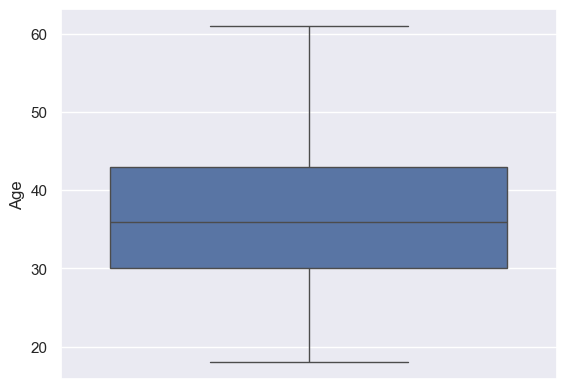

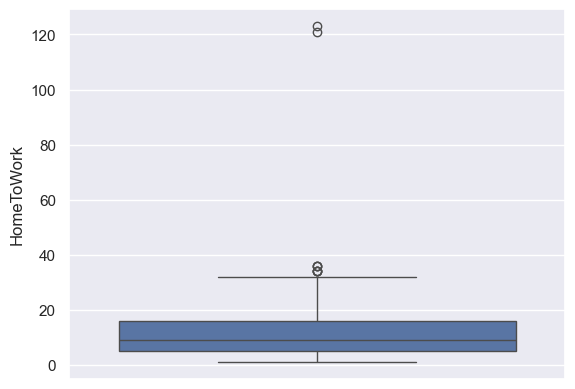

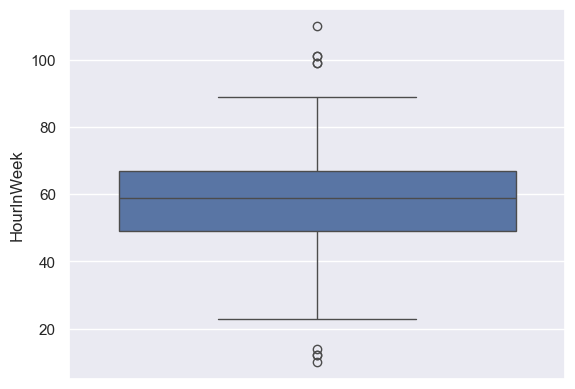

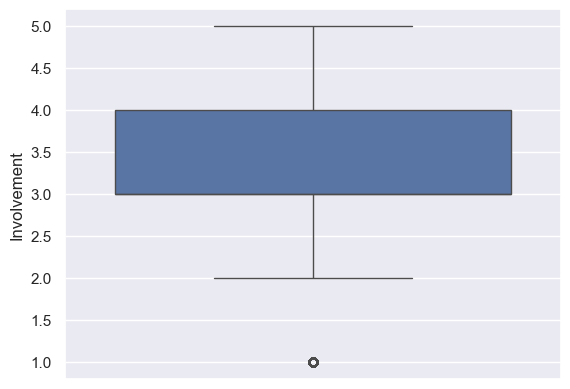

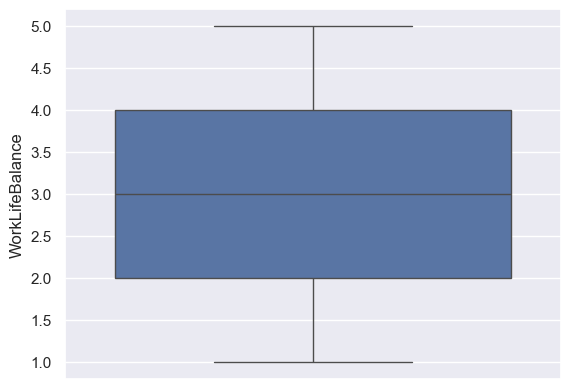

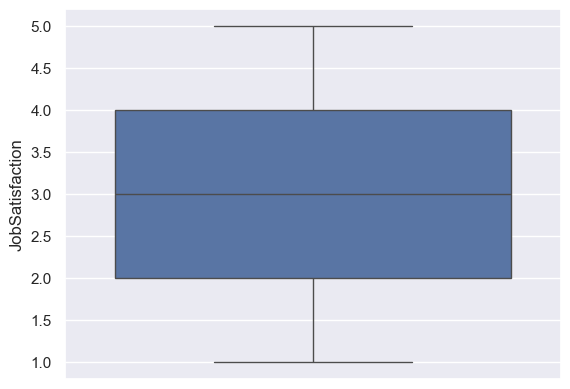

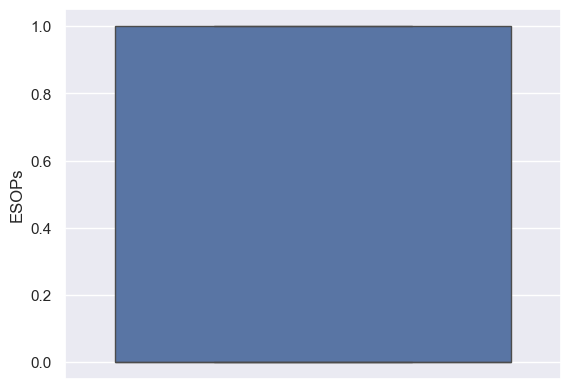

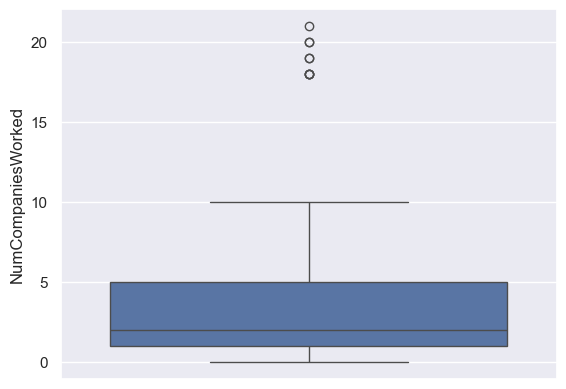

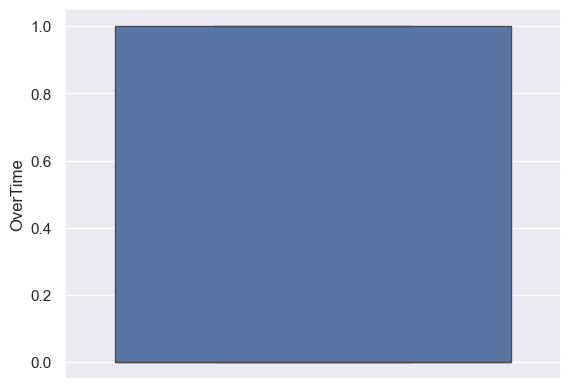

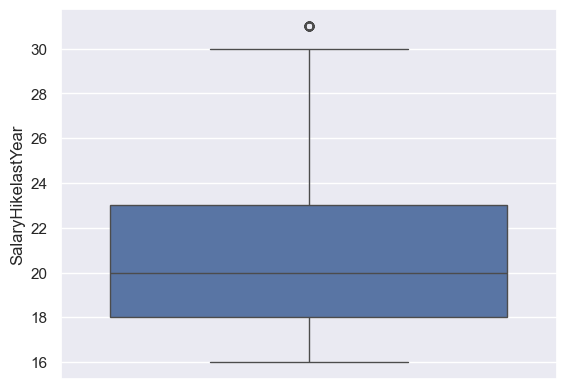

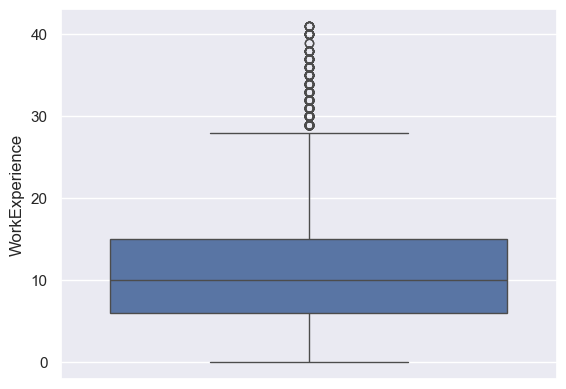

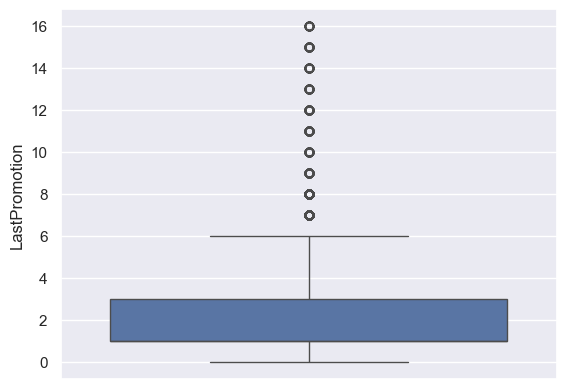

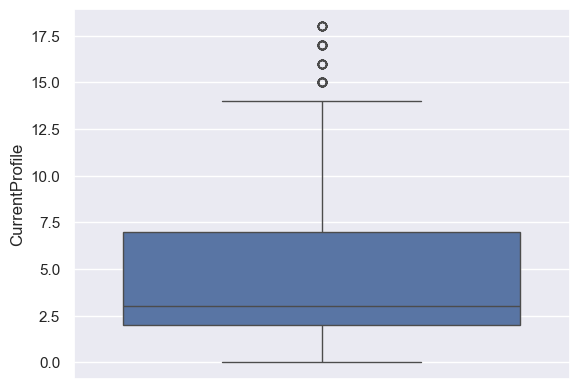

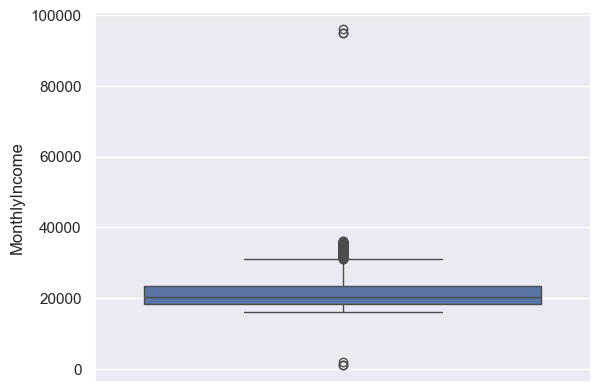

In [18]:
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

In [19]:
# missing value columns

# Numeric columns -  Age, HomeToWork, HourlnWeek, Involvement, WorkLifeBalance, JobSatisfaction, ESOPs,
# NumCompaniesWorked, OverTime, SalaryHikelastYear, WorkExperience, LastPromotion, CurrentProfile, MonthlyIncome

# Categorical columns - TravelProfile, Department, Gender, Designation, MaritalStatus, EducationField

In [20]:
all_data['TravelProfile'].value_counts()

TravelProfile
Rarely    5489
Yes       1580
No         741
Name: count, dtype: int64

In [21]:
all_data['TravelProfile']=all_data['TravelProfile'].fillna('Rarely')

In [22]:
all_data['Department'].value_counts()

Department
Analytics    4894
Sales        2407
Marketing     327
Name: count, dtype: int64

In [23]:
all_data['Department']=all_data['Department'].fillna('Analytics')

In [24]:
all_data['Gender'].value_counts()

Gender
Male      4668
Female    2020
F         1046
Name: count, dtype: int64

In [25]:
all_data['Gender']=np.where(all_data['Gender']=='F','Female',all_data['Gender'])
all_data['Gender']=all_data['Gender'].fillna('Male')

In [26]:
all_data['Designation'].value_counts()

Designation
Executive         3065
Manager           2676
Senior Manager    1154
AVP                507
VP                 340
Name: count, dtype: int64

In [27]:
all_data['Designation']=all_data['Designation'].fillna('Executive')

In [28]:
all_data['MaritalStatus'].value_counts()

MaritalStatus
Single      2709
Married     2455
Divorsed    1493
M           1153
Name: count, dtype: int64

In [29]:
all_data['MaritalStatus']=np.where(all_data['MaritalStatus']=='M','Married',all_data['MaritalStatus'])

In [30]:
all_data['MaritalStatus'].value_counts()

MaritalStatus
Married     3608
Single      2709
Divorsed    1493
Name: count, dtype: int64

In [31]:
all_data['MaritalStatus']=all_data['MaritalStatus'].fillna('Married')

In [32]:
all_data['EducationField'].value_counts()

EducationField
Statistics           3169
CA                   2417
Marketing Diploma     894
Engineer              750
Other                 429
MBA                   151
Name: count, dtype: int64

In [33]:
all_data['EducationField']=all_data['EducationField'].fillna('Statistics')

In [34]:
# missing value columns as for categorical data done above

# Numeric columns where no outliers there
# Numeric columns - Age,  WorkLifeBalance, JobSatisfaction, ESOPs, OverTime,

In [35]:
all_data['Age']=all_data['Age'].fillna(all_data['Age'].mean())

In [36]:
all_data['WorkLifeBalance']=all_data['WorkLifeBalance'].fillna(all_data['WorkLifeBalance'].mean())

In [37]:
all_data['JobSatisfaction']=all_data['JobSatisfaction'].fillna(all_data['JobSatisfaction'].mean())

In [38]:
all_data['ESOPs']=all_data['ESOPs'].fillna(all_data['ESOPs'].mean())

In [39]:
all_data['OverTime']=all_data['OverTime'].fillna(all_data['OverTime'].mean())

In [40]:
# Numeric columns where outliers there

# Numeric columns -  HomeToWork, HourlnWeek, Involvement, NumCompaniesWorked, SalaryHikelastYear,
# WorkExperience, LastPromotion, CurrentProfile, MonthlyIncome

In [41]:
all_data['HomeToWork']=all_data['HomeToWork'].fillna(all_data['HomeToWork'].median())

In [42]:
all_data['HourlnWeek']=all_data['HourlnWeek'].fillna(all_data['HourlnWeek'].median())

In [43]:
all_data['Involvement']=all_data['Involvement'].fillna(all_data['Involvement'].median())

In [44]:
all_data['NumCompaniesWorked']=all_data['NumCompaniesWorked'].fillna(all_data['NumCompaniesWorked'].median())

In [45]:
all_data['SalaryHikelastYear']=all_data['SalaryHikelastYear'].fillna(all_data['SalaryHikelastYear'].median())

In [46]:
all_data['WorkExperience']=all_data['WorkExperience'].fillna(all_data['WorkExperience'].median())

In [47]:
all_data['LastPromotion']=all_data['LastPromotion'].fillna(all_data['LastPromotion'].median())

In [48]:
all_data['CurrentProfile']=all_data['CurrentProfile'].fillna(all_data['CurrentProfile'].median())

In [49]:
all_data['MonthlyIncome']=all_data['MonthlyIncome'].fillna(all_data['MonthlyIncome'].median())

In [50]:
all_data.isnull().sum()/len(all_data)*100

Attrition             33.670465
Age                    0.000000
TravelProfile          0.000000
Department             0.000000
HomeToWork             0.000000
EducationField         0.000000
Gender                 0.000000
HourlnWeek             0.000000
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.000000
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     0.000000
WorkExperience         0.000000
LastPromotion          0.000000
CurrentProfile         0.000000
MaritalStatus          0.000000
MonthlyIncome          0.000000
data                   0.000000
dtype: float64

### 2. Handling outlier not required as per the domain and the data we have
#### If we handle the outlier it can influence our data

### 3.Encoding concept

In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7811 entries, 0 to 2629
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5181 non-null   object 
 1   Age                 7811 non-null   float64
 2   TravelProfile       7811 non-null   object 
 3   Department          7811 non-null   object 
 4   HomeToWork          7811 non-null   float64
 5   EducationField      7811 non-null   object 
 6   Gender              7811 non-null   object 
 7   HourlnWeek          7811 non-null   float64
 8   Involvement         7811 non-null   float64
 9   WorkLifeBalance     7811 non-null   float64
 10  Designation         7811 non-null   object 
 11  JobSatisfaction     7811 non-null   float64
 12  ESOPs               7811 non-null   float64
 13  NumCompaniesWorked  7811 non-null   float64
 14  OverTime            7811 non-null   float64
 15  SalaryHikelastYear  7811 non-null   float64
 16  WorkExperie

In [52]:
# Char Variables with no. of unique values 
# Features - TravelProfile=3, Department=3, Gender=2, Designation=5, MaritalStatus=3

In [53]:
all_data = pd.get_dummies(all_data,columns=['TravelProfile','Department','Gender','Designation','MaritalStatus','EducationField'],drop_first=True)

In [54]:
all_data.head()

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics
0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
1,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,...,True,False,False,False,True,False,False,False,False,True
3,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [55]:
train = all_data[all_data['data']=='Train']
test = all_data[all_data['data']=='Test']

In [56]:
train.head()

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics
0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
1,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,...,True,False,False,False,True,False,False,False,False,True
3,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [57]:
test.head()

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics
0,NaN,18.0,9.0,80.0,3.0,2.0,3.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,NaN,20.0,28.0,59.0,1.0,3.0,1.0,1.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,True
2,NaN,50.0,19.0,76.0,3.0,3.0,5.0,0.0,5.0,1.0,...,False,False,False,True,False,False,False,False,False,False
3,NaN,32.0,23.0,73.0,5.0,2.0,3.0,0.0,4.0,1.0,...,True,False,False,True,False,False,False,False,False,True
4,NaN,39.0,7.0,42.0,4.0,1.0,5.0,1.0,4.0,0.0,...,False,True,False,True,False,False,False,False,False,False


In [58]:
x = train.drop(['data','Attrition'], axis=1)
y = train['Attrition']

In [59]:
x.head()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics
0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,...,False,False,False,True,False,False,False,False,False,False
1,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,...,False,False,False,False,True,False,False,False,False,True
2,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,...,True,False,False,False,True,False,False,False,False,True
3,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,...,True,False,False,False,False,False,False,False,False,True
4,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,...,True,False,False,False,False,False,False,False,False,True


In [60]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Attrition, dtype: object

In [61]:
test=test.drop(['data','Attrition'], axis=1)

In [62]:
test.head()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics
0,18.0,9.0,80.0,3.0,2.0,3.0,1.0,1.0,0.0,17.0,...,False,False,False,False,True,False,False,False,False,False
1,20.0,28.0,59.0,1.0,3.0,1.0,1.0,2.0,1.0,18.0,...,False,False,False,False,True,False,False,False,False,True
2,50.0,19.0,76.0,3.0,3.0,5.0,0.0,5.0,1.0,22.0,...,False,False,False,True,False,False,False,False,False,False
3,32.0,23.0,73.0,5.0,2.0,3.0,0.0,4.0,1.0,17.0,...,True,False,False,True,False,False,False,False,False,True
4,39.0,7.0,42.0,4.0,1.0,5.0,1.0,4.0,0.0,20.0,...,False,True,False,True,False,False,False,False,False,False


### 4. Feature sclaing

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)

In [64]:
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.236053,-0.727156,0.867975,-2.552651,-1.427145,-1.597298,1.019198,-0.827881,1.479889,-0.172232,...,-0.716031,-0.415575,-0.21208,1.081060,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,-0.835543
1,-0.570861,-0.727156,0.313789,0.886657,-0.009037,-0.852428,-0.981353,1.858659,-0.675858,-0.172232,...,-0.716031,-0.415575,-0.21208,-0.925018,1.384641,-0.322102,-0.152001,-0.362928,-0.240821,1.196827
2,-0.682464,-0.727156,-1.032089,2.033093,-0.009037,-0.852428,1.019198,-0.060298,-0.675858,1.473125,...,1.396587,-0.415575,-0.21208,-0.925018,1.384641,-0.322102,-0.152001,-0.362928,-0.240821,1.196827
3,-0.347656,-0.121524,-2.061291,-0.259779,-0.718091,0.637311,1.019198,-0.827881,-0.675858,0.650447,...,1.396587,-0.415575,-0.21208,-0.925018,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,1.196827
4,-0.012848,1.937625,-0.715412,-0.259779,0.700017,0.637311,1.019198,1.858659,-0.675858,0.101995,...,1.396587,-0.415575,-0.21208,-0.925018,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,1.196827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,0.011243,-0.242650,0.630467,-2.552651,0.700017,0.637311,1.019198,2.242450,-0.675858,0.650447,...,-0.716031,-0.415575,-0.21208,-0.925018,1.384641,-0.322102,-0.152001,-0.362928,-0.240821,-0.835543
5177,-0.905669,-0.242650,0.313789,0.886657,-0.718091,-1.597298,1.019198,1.091076,-0.675858,-0.446458,...,-0.716031,-0.415575,-0.21208,1.081060,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,-0.835543
5178,-1.240477,1.816499,0.234620,-0.259779,0.700017,-0.107559,-0.981353,-0.827881,-0.675858,2.021578,...,-0.716031,-0.415575,-0.21208,-0.925018,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,1.196827
5179,0.011243,0.241855,1.263821,0.886657,-0.009037,1.382180,1.019198,-0.827881,-0.675858,0.650447,...,-0.716031,-0.415575,-0.21208,-0.925018,-0.722209,-0.322102,-0.152001,-0.362928,-0.240821,1.196827


### 5. Imbalanced treatment required as test data is not balanced 

In [65]:
# earlier dtype of y was object ehich was creating problem in imbalnce treatment
y=y.astype(float)

In [66]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print(y_smote.value_counts())

Attrition
0.0    3735
1.0    1446
Name: count, dtype: int64
Attrition
0.0    3735
1.0    3735
Name: count, dtype: int64


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=10)

# Building model

### 1. Ada boost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [69]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [71]:
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      2987
         1.0       0.75      0.59      0.66      1157

    accuracy                           0.83      4144
   macro avg       0.80      0.76      0.77      4144
weighted avg       0.83      0.83      0.82      4144


              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       748
         1.0       0.75      0.56      0.64       289

    accuracy                           0.83      1037
   macro avg       0.80      0.75      0.76      1037
weighted avg       0.82      0.83      0.82      1037



In [72]:
print(accuracy_score(y_train, y_pred_train_ada))
print()
print(accuracy_score(y_test, y_pred_test_ada))

0.8313223938223938

0.8264223722275795


### 2. Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=1)
rfm.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [74]:
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)

In [75]:
print(classification_report(y_train, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2987
         1.0       1.00      1.00      1.00      1157

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       748
         1.0       0.99      0.97      0.98       289

    accuracy                           0.99      1037
   macro avg       0.99      0.98      0.99      1037
weighted avg       0.99      0.99      0.99      1037



In [76]:
print(accuracy_score(y_train, y_pred_train_rfm))
print()
print(accuracy_score(y_test, y_pred_test_rfm))

1.0

0.9893924783027965


### 3. Gradient boost

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier(random_state=1)
gdm.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [78]:
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)

In [79]:
print(accuracy_score(y_train, y_pred_train_gdm))
print()
print(accuracy_score(y_test, y_pred_test_gdm))

0.9027509652509652

0.8871745419479267


In [80]:
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2987
         1.0       0.93      0.71      0.80      1157

    accuracy                           0.90      4144
   macro avg       0.91      0.84      0.87      4144
weighted avg       0.90      0.90      0.90      4144


              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       748
         1.0       0.90      0.67      0.77       289

    accuracy                           0.89      1037
   macro avg       0.89      0.82      0.85      1037
weighted avg       0.89      0.89      0.88      1037



### 4. Bagging classifier

In [82]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(random_state=1,max_features=20,n_estimators= 25)
bagging.fit(x_train, y_train)

BaggingClassifier(max_features=20, n_estimators=25, random_state=1)

In [83]:
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)

In [84]:
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2987
         1.0       1.00      1.00      1.00      1157

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       748
         1.0       0.98      0.98      0.98       289

    accuracy                           0.99      1037
   macro avg       0.99      0.98      0.99      1037
weighted avg       0.99      0.99      0.99      1037



In [85]:
print(accuracy_score(y_train, y_pred_train_bagging))
print()
print(accuracy_score(y_test, y_pred_test_bagging))

1.0

0.9884281581485053


# Cross Validation ------> with K-Fold method

In [86]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(bagging,x_train,y_train,cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())
print()
print(accuracy.min())

[0.97831325 0.97349398 0.98072289 0.98072289 0.97101449 0.97342995
 0.97826087 0.97342995 0.99033816 0.97342995]

0.9773156393690705

0.9903381642512077

0.9710144927536232


# Model Selection and hyperparamter tunning

In [87]:
# we will go with bagging classifier model

In [88]:
# Grid Search CV ----> For hyperparameter tunning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
params = {'max_features':[10,15,20,25], 'n_estimators':[10,15,20,25]}
model = BaggingClassifier()

In [91]:
grid = GridSearchCV(model,params,refit=True)
grid.fit(x_train, y_train)
grid_predict = grid.predict(x_test)
print(accuracy_score(y_test, grid_predict))
print("Best Tuned HyperParameter k : {}".format(grid.best_params_))

0.9874638379942141
Best Tuned HyperParameter k : {'max_features': 15, 'n_estimators': 25}


# Final evaluation

In [92]:
final_output = bagging.predict(test)
final_output

array([1., 0., 0., ..., 0., 1., 0.])

In [93]:
print(len(final_output))
print(len(test))

2630
2630


In [94]:
final_output=pd.DataFrame(final_output)

In [98]:
org_test=pd.read_csv('Test_Dataset.csv')

In [100]:
org_test=org_test.iloc[:,0:1]

In [101]:
org_test.head()

,EmployeeID
0,6110001
1,6110002
2,6110003
3,6110004
4,6110005


In [102]:
org_test.shape

(2630, 1)

In [103]:
final_output.shape

(2630, 1)

In [105]:
final_submit_output=pd.concat((org_test,final_output),axis=1)

In [123]:
final_submit_output.head()

,EmployeeID,0
0,Attrition,1.0
1,Attrition,0.0
2,Attrition,0.0
3,Attrition,0.0
4,Attrition,0.0


In [124]:
final_submit_output.to_csv("Final_output_for_Attrition.csv")